## Exploring Last.FM data

Mucun Tian

In [1]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [47]:
options(repr.plot.height=4.5)

# Exploring the Data
1. Plot the distribution of **play counts** per artist

read data

In [2]:
user_artistis = read_tsv('data/user_artists.dat')
head(user_artistis)

Parsed with column specification:
cols(
  userID = col_integer(),
  artistID = col_integer(),
  weight = col_integer()
)


userID,artistID,weight
2,51,13883
2,52,11690
2,53,11351
2,54,10300
2,55,8983
2,56,6152


Group by artistID and compute play counts

In [4]:
playCounts = user_artistis %>%
    group_by(artistID) %>%
    summarize(totalPlays=sum(weight))
head(playCounts)

artistID,totalPlays
1,771
2,8012
3,775
4,563
5,913
6,5080


summary the data to better selection of plot scale

In [10]:
summary(playCounts)

    artistID       totalPlays     
 Min.   :    1   Min.   :      1  
 1st Qu.: 4502   1st Qu.:    113  
 Median : 9048   Median :    350  
 Mean   : 9157   Mean   :   3924  
 3rd Qu.:13769   3rd Qu.:   1234  
 Max.   :18745   Max.   :2393140  

since 3rd percentile is 1234, choose about 3 times larger range to plot distribution.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1681 rows containing non-finite values (stat_bin).”

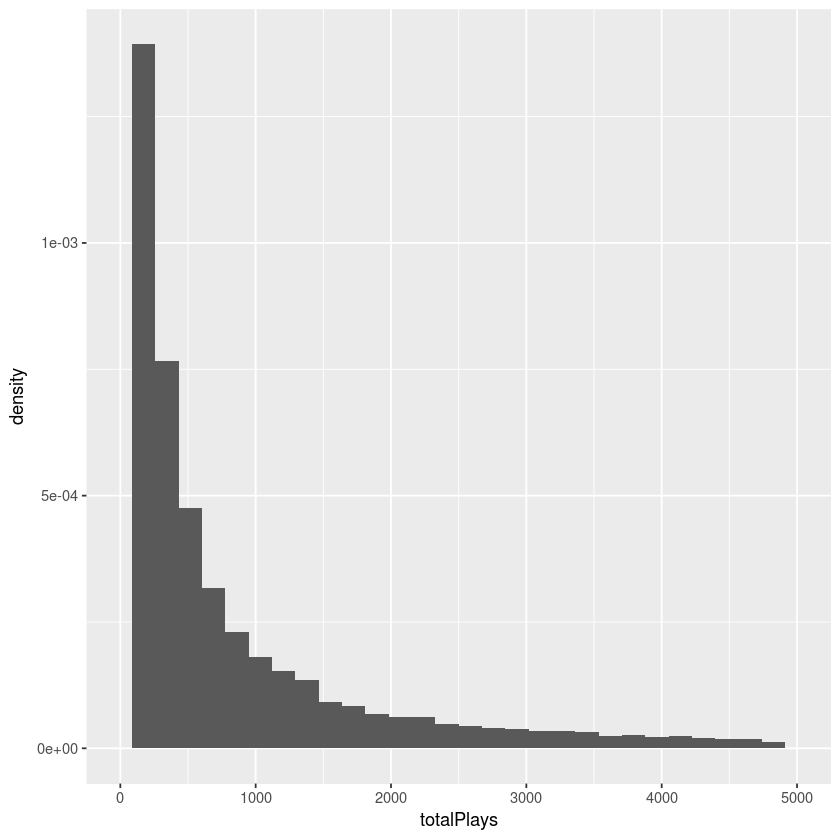

In [27]:
ggplot(data=playCounts) +
    aes(x=totalPlays) +
    geom_histogram(mapping=aes(y=..density..)) +
    xlim(0, 5000)

From distribution above, play counts for most artists are within the range 0 to 1000

2.Plot the distribution of **unique users** playing each artist
<p>Group data by artistID and compute number of unique users</p>
<font color="red">Notice: it might be good to first check if duplicate rows exist</font>

In [20]:
select(user_artistis, artistID, userID) %>% 
    distinct() %>%
    nrow()
nrow(user_artistis)

[1] 92834

[1] 92834

All the rows are distinct, group data to compute number of unique users

In [21]:
uniqueUsersPerArtist = user_artistis %>%
    group_by(artistID) %>%
    summarize(uniqueUsers=n())
head(uniqueUsersPerArtist)

artistID,uniqueUsers
1,3
2,12
3,3
4,2
5,2
6,10


plot the distribution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


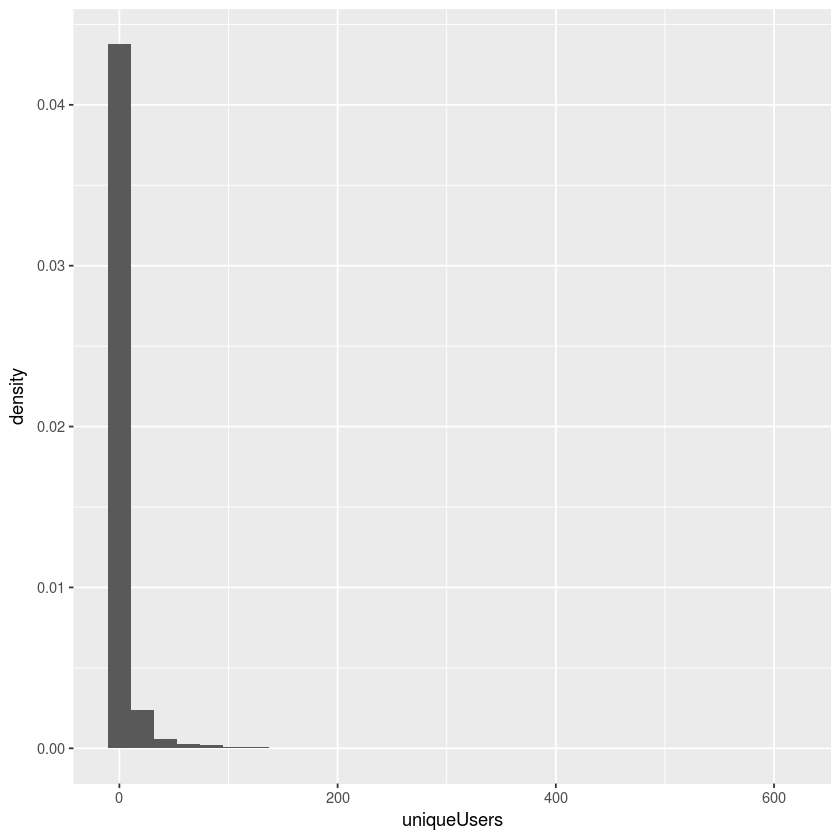

In [26]:
ggplot(data=uniqueUsersPerArtist) +
    aes(x=uniqueUsers) +
    geom_histogram(mapping=aes(y=..density..))

most artists are played by less than 100 unique users

<p> 3. Plot the distribution of <b>play counts</b> per user</p>
- group data by userID and compute the total play counts (summation of weights)

In [33]:
playCountsPerUser = user_artistis %>%
    group_by(userID) %>%
    summarise(totalPlays=sum(weight))
head(playCountsPerUser)
summary(playCountsPerUser)

userID,totalPlays
2,168737
3,20501
4,26930
5,13159
6,1011
7,135399


     userID         totalPlays    
 Min.   :   2.0   Min.   :     3  
 1st Qu.: 505.5   1st Qu.:  9742  
 Median :1031.0   Median : 21573  
 Mean   :1038.4   Mean   : 36567  
 3rd Qu.:1572.2   3rd Qu.: 42964  
 Max.   :2100.0   Max.   :480039  

plot the distribution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


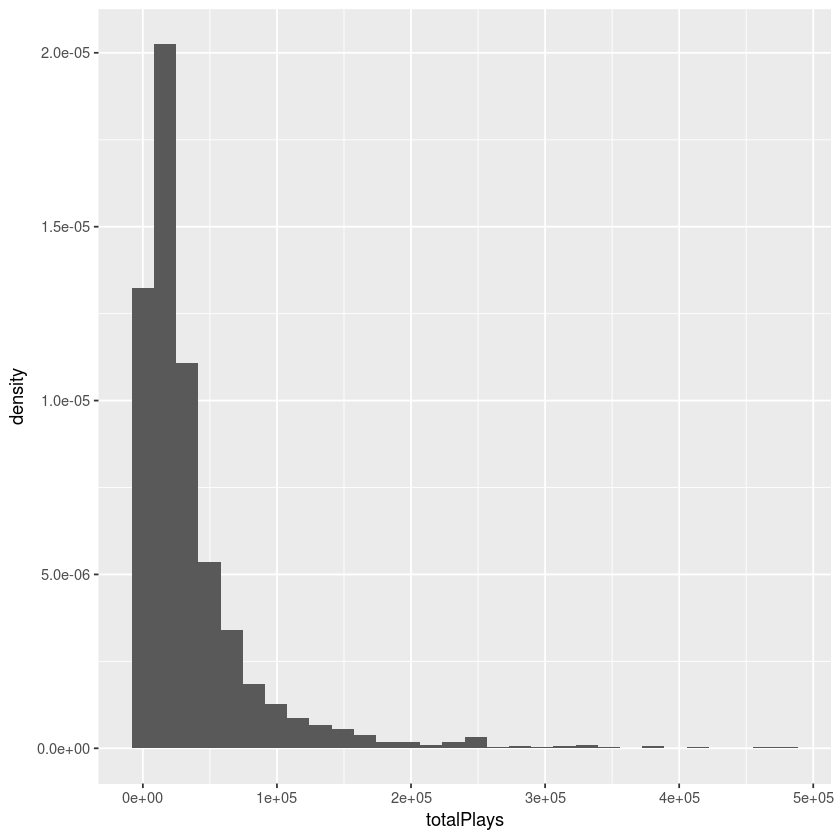

In [37]:
ggplot(data=playCountsPerUser) +
    aes(x=totalPlays) +
    geom_histogram(mapping=aes(y=..density..))

most users' play counts are under $1*10^5$ times

<p>4. Plot the distribution of **unique artists** per user</p>
- Since we already checked there is no duplicate rows, the **"unique artists per user"** is just the artist counts group by userID

In [38]:
uniqueArtistsPerUser = user_artistis %>%
    group_by(userID) %>%
    summarize(artistCounts=n())
head(uniqueArtistsPerUser)
summary(uniqueArtistsPerUser)

userID,artistCounts
2,50
3,50
4,50
5,50
6,50
7,50


     userID        artistCounts  
 Min.   :   2.0   Min.   : 1.00  
 1st Qu.: 505.5   1st Qu.:50.00  
 Median :1031.0   Median :50.00  
 Mean   :1038.4   Mean   :49.07  
 3rd Qu.:1572.2   3rd Qu.:50.00  
 Max.   :2100.0   Max.   :50.00  

plot the distribution

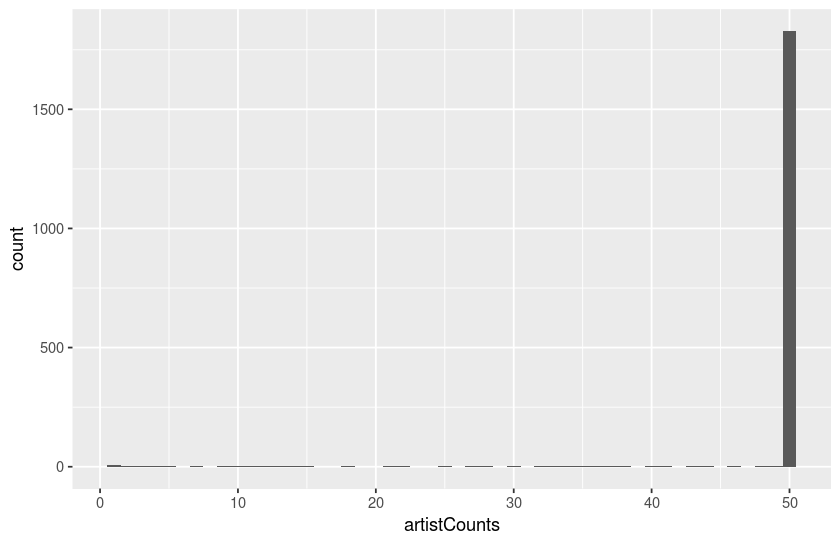

In [53]:
ggplot(data=uniqueArtistsPerUser) +
    aes(x=artistCounts) +
    geom_histogram(binwidth=1)

most users listened 50 unique artists.

<p>5. What is the mean artists-per-user? Users-per-artist? Plays per user/artist pair?</p>
- we can use summary to get statistics of each dataframe

In [56]:
summary(select(uniqueArtistsPerUser, artistCounts))
summary(select(uniqueUsersPerArtist, uniqueUsers))
summary(select(user_artistis, weight))

  artistCounts  
 Min.   : 1.00  
 1st Qu.:50.00  
 Median :50.00  
 Mean   :49.07  
 3rd Qu.:50.00  
 Max.   :50.00  

  uniqueUsers     
 Min.   :  1.000  
 1st Qu.:  1.000  
 Median :  1.000  
 Mean   :  5.265  
 3rd Qu.:  3.000  
 Max.   :611.000  

     weight        
 Min.   :     1.0  
 1st Qu.:   107.0  
 Median :   260.0  
 Mean   :   745.2  
 3rd Qu.:   614.0  
 Max.   :352698.0  

The mean of artists-per-user is **49.7**
<p> The mean of users-per-artist is **5.265**</p>
<p> The mean of plays per user/artist pair is <b>745.2</b></p>

<p>6. What are the 10 artists with the most plays?</p>
- Group by artists and compute the play counts. And inner_join artists.dat to get the artist name information.

In [61]:
artists = read_tsv('data/artists.dat')
user_artistis %>%
    group_by(artistID) %>%
    summarize(totalPlays=sum(weight)) %>%
    inner_join(select(artists, artistID=id, name=name)) %>%
    arrange(desc(totalPlays)) %>%
    head(n=10)

Parsed with column specification:
cols(
  id = col_integer(),
  name = col_character(),
  url = col_character(),
  pictureURL = col_character()
)
Warning message:
“1 parsing failure.
 row  col           expected actual
1678 name delimiter or quote       
”Joining, by = "artistID"


artistID,totalPlays,name
289,2393140,Britney Spears
72,1301308,Depeche Mode
89,1291387,Lady Gaga
292,1058405,Christina Aguilera
498,963449,Paramore
67,921198,Madonna
288,905423,Rihanna
701,688529,Shakira
227,662116,The Beatles
300,532545,Katy Perry


The 10 artists with the most plays: **Britney Spears, Depeche Mode, Lady Gaga, Christina Aguilera, Paramore, Madonna, Rihanna, Shakira, The Beatles, Katy Perry** 

<p>7. What are the 10 artists with the most unique playing users?</p>
- Group by artist and compute the count of unique users since we already checked each user/item pair is unique for each artist

In [62]:
user_artistis %>%
    group_by(artistID) %>%
    summarize(uniqueUsers=n()) %>%
    inner_join(select(artists, artistID=id, name=name)) %>%
    arrange(desc(uniqueUsers)) %>%
    head(n=10)

Joining, by = "artistID"


artistID,uniqueUsers,name
89,611,Lady Gaga
289,522,Britney Spears
288,484,Rihanna
227,480,The Beatles
300,473,Katy Perry
67,429,Madonna
333,417,Avril Lavigne
292,407,Christina Aguilera
190,400,Muse
498,399,Paramore


The 10 artists with the most unique playing users are shown above.

## Association Rules
- get the co-play table

In [67]:
coplays = user_artistis %>%
    select(a1=artistID, userID) %>%
    inner_join(select(user_artistis, a2=artistID, userID)) %>%
    filter(a1 != a2) %>%
    group_by(a1, a2) %>%
    summarize(count = n())

Joining, by = "userID"


<p>1. What pair of artists has been co-played the most often?</p>
- arrange coplays table by count

In [70]:
coplays %>%
    arrange(desc(count)) %>%
    head(n=1) %>%
    inner_join(select(artists, a1=id, name1=name)) %>%
    inner_join(select(artists, a2=id, name2=name))

Joining, by = "a1"
Joining, by = "a2"


a1,a2,count,name1,name2
89,289,436,Lady Gaga,Britney Spears


The pair of artists co-played the most often is **Lady Gaga and Britney Spears**

<p>2. How many users have listened to both Nickelback and Britney Spears?</p>
- join coplays and artists table to get name of artists and filter that specific row to get the answer

In [83]:
NBPair = coplays %>%
    inner_join(select(artists, a1=id, name1=name)) %>%
    inner_join(select(artists, a2=id, name2=name)) %>%
    filter(name1=='Nickelback') %>%
    filter(name2=='Britney Spears')

Joining, by = "a1"
Joining, by = "a2"


In [84]:
NBPair

a1,a2,count,name1,name2
966,289,46,Nickelback,Britney Spears


46 users have listened to both Nickelback and Britney Spears.

<p>3. What is the probability that a randomly-selected user has listened to both Nickelback and Britney Spears?</p>
- the probability is equal to the number of users listened to both artists divided by the number of total users.

In [87]:
totalUsers = user_artistis %>%
    select(userID) %>%
    distinct() %>%
    nrow()
P = NBPair['count']/totalUsers
P

count
0.0243129


Probability of **0.0243129** a randomly-selected user has listened to both Nickelback and Britney Spears

<p>4. Given that a user has listened to Nickelback, what is the probability that they have also listened to Britney Spears?</p>
- the probability is equal to the number of users listened to both artists divided by the number of users listened to Nickelback

In [91]:
usersListenedN = uniqueUsersPerArtist %>%
    filter(artistID==966) %>%
    select(uniqueUsers)

In [103]:
usersListenedN

uniqueUsers
112


In [94]:
P4 = NBPair['count']/usersListenedN['uniqueUsers']
P4

count
0.4107143


The probability is **0.4107143** 

<p>5. Given that a user has listened to Aretha Franklin, what 10 artists are they most likely to have listened to?</p>
- filter coplays table with Aretha Franklin and sort by user count

In [99]:
PairIncludedAF = coplays %>%
    inner_join(select(artists, a1=id, name1=name)) %>%
    filter(name1=='Aretha Franklin') %>%
    inner_join(select(artists, a2=id, name2=name))

Joining, by = "a1"
Joining, by = "a2"


In [100]:
PairIncludedAF %>%
    arrange(desc(count)) %>%
    head(n=10)

a1,a2,count,name1,name2
575,67,10,Aretha Franklin,Madonna
575,227,9,Aretha Franklin,The Beatles
575,55,8,Aretha Franklin,Kylie Minogue
575,89,8,Aretha Franklin,Lady Gaga
575,288,8,Aretha Franklin,Rihanna
575,292,8,Aretha Franklin,Christina Aguilera
575,295,8,Aretha Franklin,Beyoncé
575,903,8,Aretha Franklin,Amy Winehouse
575,300,7,Aretha Franklin,Katy Perry
575,97,6,Aretha Franklin,Duffy


They are most likely to have listened to those 10 artists in the column of name2 of the dataframe above.

## Extending Association Rules
<p>1. What 10 artists have the highest lift with respect to Aretha Franklin?</p>

In [117]:
PairIncludedAF %>%
    inner_join(select(uniqueUsersPerArtist, a2=artistID, Y_Count=uniqueUsers)) %>%
    inner_join(select(uniqueUsersPerArtist, a1=artistID, X_Count=uniqueUsers)) %>%
    select(nameY=name2,XY_Count=count,X_Count,Y_Count) %>%
    mutate(lift = (XY_Count/totalUsers)/((X_Count/totalUsers)*(Y_Count/totalUsers))) %>%
    arrange(desc(lift)) %>%
    head(n=10)

Joining, by = "a2"
Joining, by = "a1"
Adding missing grouping variables: `a1`


a1,nameY,XY_Count,X_Count,Y_Count,lift
575,The Fleshtones,1,22,1,86
575,The Satelliters,1,22,1,86
575,The Barracudas,1,22,1,86
575,The Staggers,1,22,1,86
575,The Swingin' Neckbreakers,1,22,1,86
575,The Strollers,1,22,1,86
575,The Fuzztones,1,22,1,86
575,The Maharajas,1,22,1,86
575,The Untamed Youth,1,22,1,86
575,Mahalia Jackson,2,22,2,86


10 artists have the highest lift with respect to Aretha Franklin is shown as above

<p>2. What is the lift of Nickelback and Britney Spears?</p>

In [118]:
NBPair = coplays %>%
    inner_join(select(artists, a1=id, name1=name)) %>%
    inner_join(select(artists, a2=id, name2=name)) %>%
    filter(name1=='Nickelback') %>%
    filter(name2=='Britney Spears')

Joining, by = "a1"
Joining, by = "a2"


In [119]:
NBPair

a1,a2,count,name1,name2
966,289,46,Nickelback,Britney Spears


In [120]:
NBPair %>%
    inner_join(select(uniqueUsersPerArtist, a2=artistID, Y_Count=uniqueUsers)) %>%
    inner_join(select(uniqueUsersPerArtist, a1=artistID, X_Count=uniqueUsers)) %>%
    select(nameY=name2,XY_Count=count,X_Count,Y_Count) %>%
    mutate(lift = (XY_Count/totalUsers)/((X_Count/totalUsers)*(Y_Count/totalUsers)))

Joining, by = "a2"
Joining, by = "a1"
Adding missing grouping variables: `a1`


a1,nameY,XY_Count,X_Count,Y_Count,lift
966,Britney Spears,46,112,522,1.488643


the lift of Nickelback and Britney Spears is 1.488643

In [124]:
BOPair = coplays %>%
    inner_join(select(artists, a1=id, name1=name)) %>%
    inner_join(select(artists, a2=id, name2=name)) %>%
    filter(name1=='Ozzy Ozborne') %>%
    filter(name2=='Britney Spears')

Joining, by = "a1"
Joining, by = "a2"


In [125]:
BOPair

a1,a2,count,name1,name2


In [126]:
BOPair %>%
    inner_join(select(uniqueUsersPerArtist, a2=artistID, Y_Count=uniqueUsers)) %>%
    inner_join(select(uniqueUsersPerArtist, a1=artistID, X_Count=uniqueUsers)) %>%
    select(nameY=name2,XY_Count=count,X_Count,Y_Count) %>%
    mutate(lift = (XY_Count/totalUsers)/((X_Count/totalUsers)*(Y_Count/totalUsers)))

Joining, by = "a2"
Joining, by = "a1"
Adding missing grouping variables: `a1`


a1,nameY,XY_Count,X_Count,Y_Count,lift


the lift of Britney Spears and Ozzy Ozborne is 0 since no coplay pair of these two artists